In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
df = pd.read_csv('final.csv', low_memory=False)

In [3]:
category_counts = df['category'].value_counts()
print(category_counts)
subcategory_counts = df['subcategory '].value_counts()
print(subcategory_counts)

category
DoS               60000
Reconnaissance    40000
DDoS              40000
Normal             6934
Theft              1587
Name: count, dtype: int64
subcategory 
OS_Fingerprint       20000
Service_Scan         20000
TCP DoS              20000
HTTP DoS             20000
UDP DoS              20000
TCP DDoS             20000
UDP DDoS             20000
Normal                6934
Keylogging            1469
Data_Exfiltration      118
Name: count, dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148521 entries, 0 to 148520
Data columns (total 35 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   pkSeqID       148521 non-null  int64  
 1   stime         148521 non-null  float64
 2   flgs          148521 non-null  object 
 3   proto         148521 non-null  object 
 4   saddr         148521 non-null  object 
 5   sport         148079 non-null  object 
 6   daddr         148521 non-null  object 
 7   dport         148079 non-null  object 
 8   pkts          148521 non-null  int64  
 9   bytes         148521 non-null  int64  
 10  state         148521 non-null  object 
 11  ltime         148521 non-null  float64
 12  seq           148521 non-null  int64  
 13  dur           148521 non-null  float64
 14  mean          148521 non-null  float64
 15  stddev        148521 non-null  float64
 16  smac          0 non-null       float64
 17  dmac          0 non-null       float64
 18  sum 

In [5]:
df.dropna(inplace=True, how='all', axis=1)

In [6]:
df.dropna(inplace=True, how='any', axis=0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148079 entries, 0 to 148520
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   pkSeqID       148079 non-null  int64  
 1   stime         148079 non-null  float64
 2   flgs          148079 non-null  object 
 3   proto         148079 non-null  object 
 4   saddr         148079 non-null  object 
 5   sport         148079 non-null  object 
 6   daddr         148079 non-null  object 
 7   dport         148079 non-null  object 
 8   pkts          148079 non-null  int64  
 9   bytes         148079 non-null  int64  
 10  state         148079 non-null  object 
 11  ltime         148079 non-null  float64
 12  seq           148079 non-null  int64  
 13  dur           148079 non-null  float64
 14  mean          148079 non-null  float64
 15  stddev        148079 non-null  float64
 16  sum           148079 non-null  float64
 17  min           148079 non-null  float64
 18  max      

In [8]:
df.rename(columns={
    "pkSeqID": "ID",  # The identifier of the row
    "stime": "StartTime",  # Record start time
    "ltime": "LastTime",  # Record last time
    "flgs": "Flags", # Flow state flags seen in transactions
    "seq": "ArgusSequenceNumber",  # Argus sequence number
    "dur": "TotalDuration",  # Record total duration
    "mean": "AverageDuration",  # Average duration of aggregated records
    "stddev": "StandardDeviation",  # Standard deviation of aggregated records
    "sum": "TotalDurationAggregated",  # Total duration of aggregated records
    "Stime": "StartTime",  # Record start time
    "proto": "Protocol",  # Textual representation of transaction protocols present in network flow
    "saddr": "SourceIPAddress",  # Source IP address
    "sport": "SourcePort",  # Source port number
    "daddr": "DestinationIPAddress",  # Destination IP address
    "dport": "DestinationPort",  # Destination port number
    "pkts": "PacketCount",  # Total count of packets in transaction
    "bytes": "TotalBytes",  # Total number of bytes in transaction records
    "state": "TransactionState",  # Transaction state
    "min": "MinimumDuration",  # Minimum duration of aggregated records
    "max": "MaximumDuration",  # Maximum duration of aggregated records
    "spkts": "SourceToDestinationPacketCount",  # Source-to-destination packet count
    "dpkts": "DestinationToSourcePacketCount",  # Destination-to-source packet count
    "sbytes": "SourceToDestinationByteCount",  # Source-to-destination byte count
    "dbytes": "DestinationToSourceByteCount",  # Destination-to-source byte count
    "rate": "TotalPacketsPerSecond",  # Total packets per second in transaction
    "srate": "SourceToDestinationPacketsPerSecond",  # Source-to-destination packets per second
    "drate": "DestinationToSourcePacketsPerSecond",  # Destination-to-source packets per second
    "attack": "Attack",  # Class label: 0 for Normal traffic, 1 for Attack Traffic
    "category": "TrafficCategory",  # Traffic category
    "subcategory ": "TrafficSubcategory"  # Traffic subcategory
}, inplace=True)

In [9]:
a = df.tail()

In [10]:
object_columns = df.select_dtypes(include='object').columns.tolist()
print(object_columns)


['Flags', 'Protocol', 'SourceIPAddress', 'SourcePort', 'DestinationIPAddress', 'DestinationPort', 'TransactionState', 'TrafficCategory', 'TrafficSubcategory']


In [11]:
encoder = LabelEncoder()

selected_cols = ['Flags', 'Protocol', 'SourceIPAddress', 'SourcePort',
                  'DestinationIPAddress', 'DestinationPort', 'TransactionState', 'TrafficCategory', 'TrafficSubcategory']
encoded_df = df.copy()

for col in selected_cols:
    encoded_df[col] = encoder.fit_transform(encoded_df[col])

df_encoded = encoded_df.drop(selected_cols, axis=1)

In [12]:
encoded_df.corr()

,ID,StartTime,Flags,Protocol,SourceIPAddress,SourcePort,DestinationIPAddress,DestinationPort,PacketCount,TotalBytes,...,SourceToDestinationPacketCount,DestinationToSourcePacketCount,SourceToDestinationByteCount,DestinationToSourceByteCount,TotalPacketsPerSecond,SourceToDestinationPacketsPerSecond,DestinationToSourcePacketsPerSecond,Attack,TrafficCategory,TrafficSubcategory
ID,1.000000,0.470698,0.150429,0.498860,-0.085759,-0.107341,-0.062957,0.390937,-0.024386,-0.014468,...,-0.025696,-0.016606,-0.017896,-0.007610,-0.105768,-0.062936,-0.093811,0.163432,-0.753861,0.553308
StartTime,0.470698,1.000000,0.360624,0.229025,-0.181429,-0.168296,-0.163220,0.646729,-0.018967,0.004697,...,-0.027301,-0.003057,-0.009685,0.010720,-0.172005,-0.074104,-0.113512,0.318215,-0.769548,0.288610
Flags,0.150429,0.360624,1.000000,-0.381437,-0.146483,-0.231622,-0.026523,0.310146,-0.006737,0.001950,...,-0.011713,0.001631,-0.002486,0.003634,-0.087045,-0.050445,-0.075260,0.129320,-0.417717,0.203159
Protocol,0.498860,0.229025,-0.381437,1.000000,0.135037,-0.039397,0.166214,0.275644,0.003965,-0.001833,...,0.005960,0.000299,0.000603,-0.002493,-0.093156,-0.039396,-0.081162,-0.275620,-0.368723,0.581889
SourceIPAddress,-0.085759,-0.181429,-0.146483,0.135037,1.000000,0.020102,0.093198,-0.135778,0.090324,0.044677,...,0.103916,0.049732,0.067932,0.016755,-0.009078,-0.011806,-0.023402,-0.556847,0.140286,-0.138165
SourcePort,-0.107341,-0.168296,-0.231622,-0.039397,0.020102,1.000000,0.012877,-0.118744,0.024619,0.012719,...,0.025819,0.016932,0.018772,0.005072,0.033501,0.026631,0.039790,-0.038301,0.177306,-0.255985
DestinationIPAddress,-0.062957,-0.163220,-0.026523,0.166214,0.093198,0.012877,1.000000,-0.039425,-0.005814,-0.003723,...,-0.006388,-0.003606,-0.004386,-0.002075,-0.028129,0.039277,-0.030623,-0.606127,0.025206,-0.104813
DestinationPort,0.390937,0.646729,0.310146,0.275644,-0.135778,-0.118744,-0.039425,1.000000,0.003178,-0.001557,...,0.001065,0.005244,-0.001522,-0.001034,-0.156538,-0.029861,-0.073173,0.107307,-0.702937,0.275986
PacketCount,-0.024386,-0.018967,-0.006737,0.003965,0.090324,0.024619,-0.005814,0.003178,1.000000,0.715828,...,0.923680,0.856300,0.658133,0.497546,-0.004594,-0.002332,-0.003342,-0.139233,0.020670,-0.034819
TotalBytes,-0.014468,0.004697,0.001950,-0.001833,0.044677,0.012719,-0.003723,-0.001557,0.715828,1.000000,...,0.530994,0.788468,0.544348,0.894736,-0.002624,-0.001384,-0.001757,-0.061612,0.020023,-0.025949


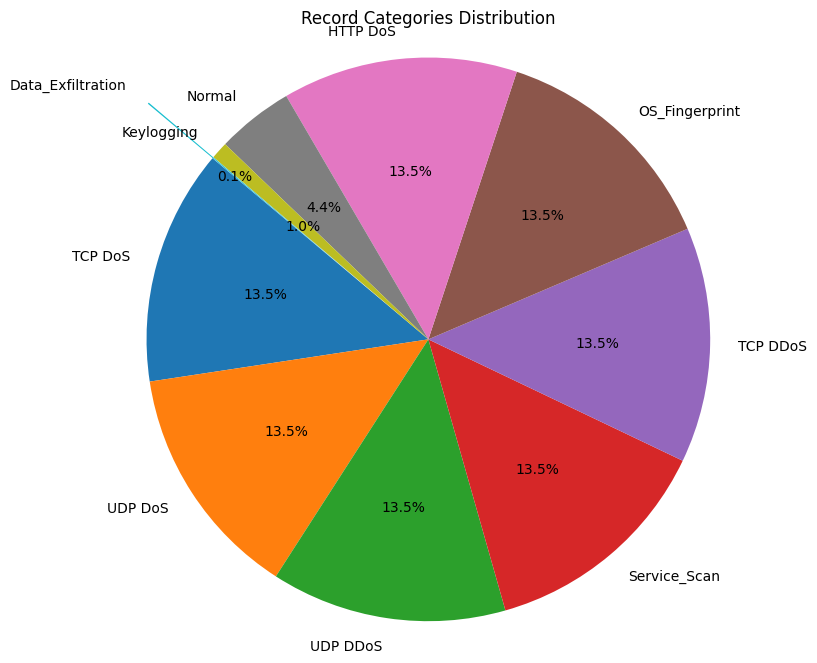

In [13]:
value_counts = df['TrafficSubcategory'].value_counts()

def calculate_explode(values, threshold=0.009, max_explode=0.3):
    explode_values = []
    total_values = values.sum()
    for value in values:
        if value / total_values < threshold:
            explode_values.append(max_explode)
        else:
            explode_values.append(0)
    return explode_values

# Calculate explode values
explode = calculate_explode(value_counts)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, explode=explode)    
plt.title('Record Categories Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

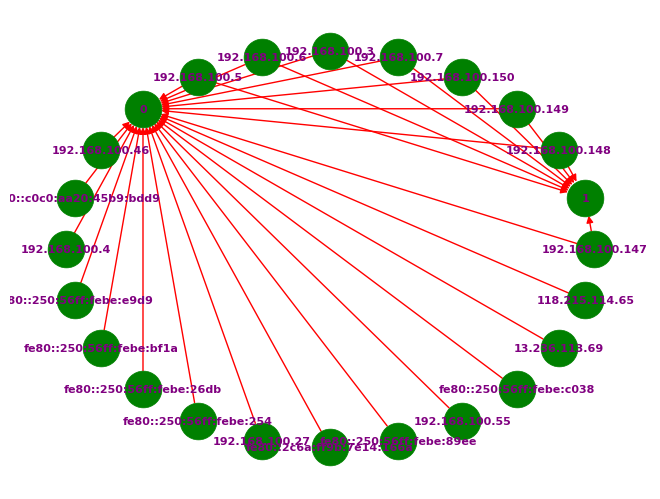

In [14]:
def representation(data, node, edge):
  Graph = nx.from_pandas_edgelist(data, node, edge, create_using = nx.DiGraph())
  pos = nx.circular_layout(Graph)
  nx.draw(Graph, pos, with_labels = True, font_weight = "bold", node_size = 700, node_color = "green", 
          font_size = 8, edge_color = "red", linewidths = 0.5, font_color = "purple")
  plt.show()

representation(df, "SourceIPAddress", "Attack") # First representation

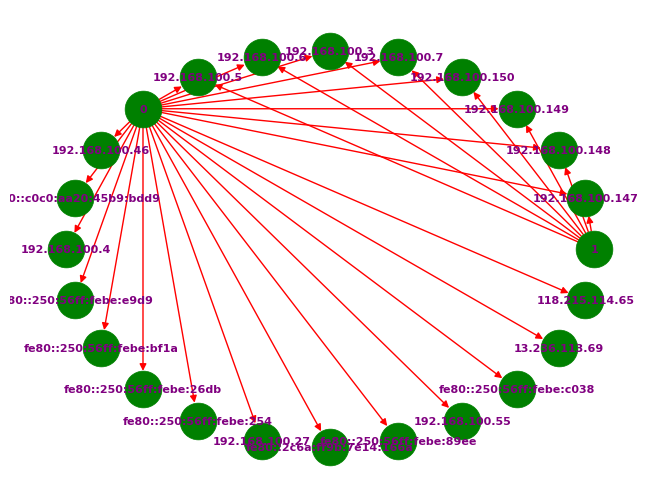

In [15]:
representation(df, "Attack", "SourceIPAddress") # Second representation

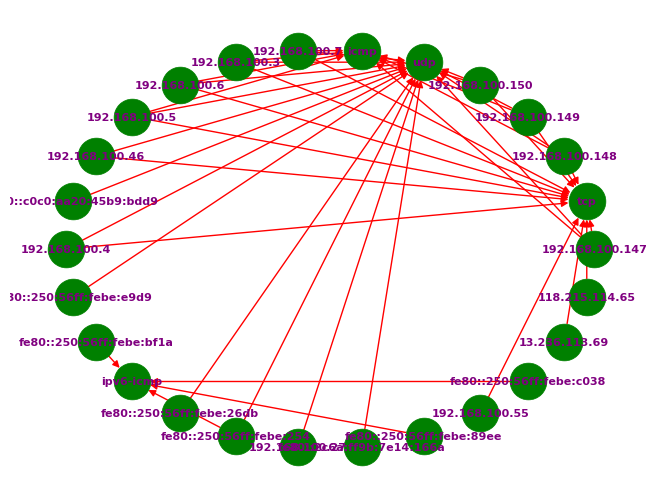

In [16]:
representation(df, "SourceIPAddress", "Protocol") # Third representation

In [ ]:
# Fourth representation
# user_node = input("Enter the attribute that will be used as a node: ") # For example: SourceIP
# user_edge = input("Enter the attribute that will be used as an edge: ") # For example: State
# representation(df, user_node, user_edge)

In [24]:
import networkx as nx

def bfs(G: nx.DiGraph, start: str, end: str):
    # Check if the start and end nodes are in the graph
    if start not in G.nodes() or end not in G.nodes():
        return None

    # Initialize a queue to store nodes to be explored
    queue = [(start, [start])]

    # While there are nodes in the queue
    while queue:
        # Dequeue a node and its path
        node, path = queue.pop(0)

        # Check if the current node is the end node
        if node == end:
            return path

        # Explore neighbors of the current node
        for neighbor in G.neighbors(node):
            # Avoid revisiting nodes already in the path
            if neighbor not in path:
                # Enqueue neighbor node and its path
                queue.append((neighbor, path + [neighbor]))

    # If the end node is not reached, return None
    return None

In [26]:
def calculate_packets(Graph, path):
  packets = 0

  for i in range(len(path) - 1):
    origin = path[i]
    destination = path[i + 1]

    if Graph.has_edge(origin, destination):
      packets += Graph[origin][destination]["PacketCount"]
    else:
      print(f"Warning: No direct edge between {origin} and {destination}")

  return packets

In [27]:
Graph = nx.from_pandas_edgelist(df, "SourceIPAddress", "DestinationIPAddress", ["Attack", "PacketCount"], 
                                create_using = nx.DiGraph())
graph_dict = dict(Graph.adjacency())

origin = "192.168.100.150"
destination = "192.168.217.2"

path = bfs(Graph, origin, destination)

print("\n", end = "")
if path:
  print(f"Path from {origin} to {destination}: ", end = "")
  for ip in path:
    if ip != path[-1]:
      print(f"{ip} -> ", end = "")
    else:
      print(ip)
  
  packets = calculate_packets(Graph, path)
  print(f"Total number of sent packets: {packets}")
else:
  print(f"No path found from {origin} to {destination}")
print("\n", end = "")


Path from 192.168.100.150 to 192.168.217.2: 192.168.100.150 -> 192.168.217.2
Total number of sent packets: 2



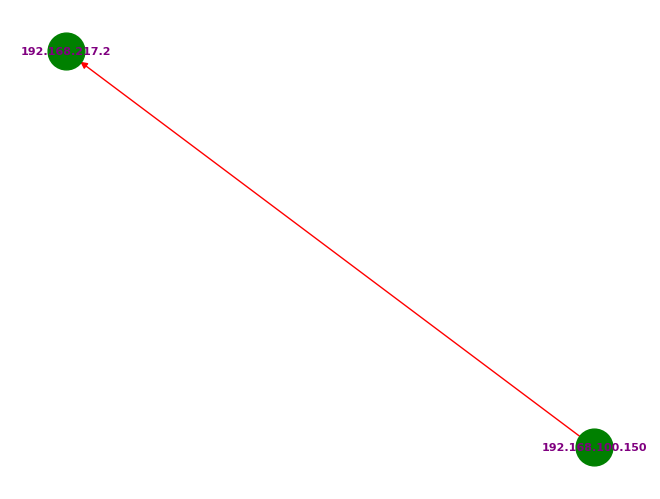

In [28]:
path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
path_graph = Graph.edge_subgraph(path_edges)
pos = nx.spring_layout(path_graph)
nx.draw(path_graph, pos, with_labels=True, font_weight="bold", font_size = 8, node_color="green", 
        node_size = 700, edge_color = "red", font_color = "purple")
plt.show()

In [39]:
def representation_with_colors(data, node, edge, colors):
  Graph = nx.from_pandas_edgelist(data, node, edge, create_using = nx.DiGraph())
  
  source_ip_colors = {ip: color for ip, color in zip(data["Protocol"].unique(), colors)}
  node_colors = [source_ip_colors.get(ip, "green") for ip in Graph.nodes()]

  pos = nx.circular_layout(Graph)
  nx.draw(Graph, pos, with_labels = True, font_weight = "bold", node_size = 700, node_color = node_colors,
      edge_color = "red", font_size = 8, linewidths = 0.5, font_color = "purple") 

  plt.show()

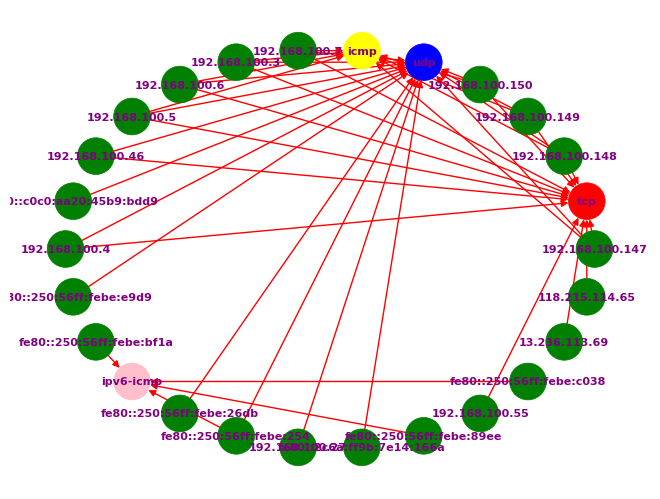

In [40]:
colors = ["red", "blue", "yellow", "pink"]
protocols = ["tcp", "udp", "icmp", "ipv6-icmp"]

# for index in range(5):
#   color = input(f"Enter the color for the protocol {protocols[index]}: ")
#   colors[index] = color

representation_with_colors(df, "SourceIPAddress", "Protocol", colors)

Graph = nx.from_pandas_edgelist(df, "SourceIPAddress", "DestinationIPAddress", ["Attack", "PacketCount"], create_using=nx.DiGraph())

In [41]:
def plot_xy_graph(quantity, graph_name, x_label, y_label):
  quantity_nodes = list(quantity.keys())
  quantity_values = list(quantity.values())

  plt.scatter(quantity_nodes, quantity_values, s = 5)
  plt.title(graph_name)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.show()

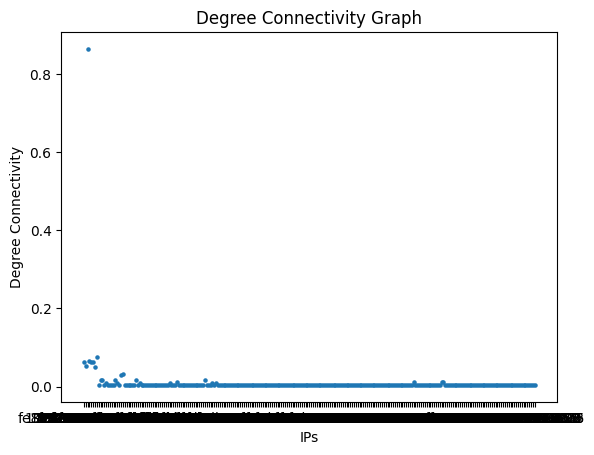

In [42]:
# Degree connectivity
degree_connectivity = nx.degree_centrality(Graph)
plot_xy_graph(degree_connectivity, "Degree Connectivity Graph", "IPs", "Degree Connectivity")

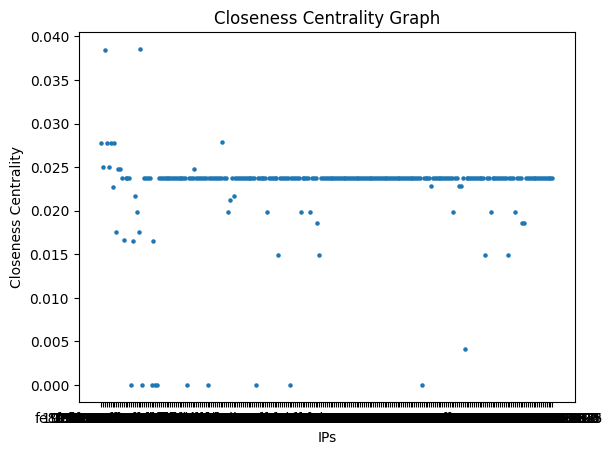

In [43]:
# Closeness connectivity
closeness_centrality = nx.closeness_centrality(Graph)
plot_xy_graph(closeness_centrality, "Closeness Centrality Graph", "IPs", "Closeness Centrality")

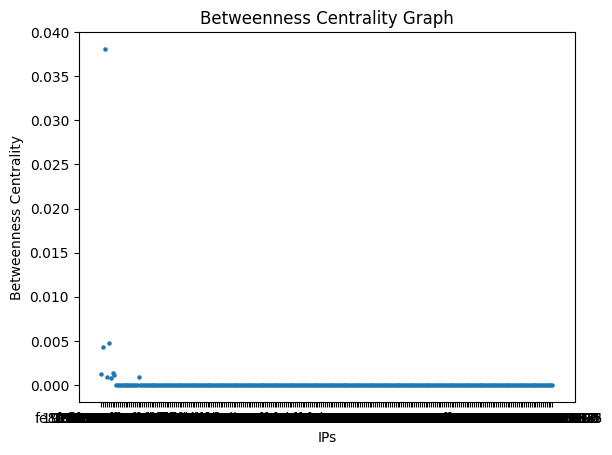

In [44]:
# Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(Graph)
plot_xy_graph(betweenness_centrality, "Betweenness Centrality Graph", "IPs", "Betweenness Centrality")

In [45]:
# Network Density
network_density = nx.density(Graph)
print("Network Density:", network_density)

Network Density: 0.0050164949154848145


In [46]:
# Network Diameter and Network average Path Length
largest_strongly_connected_component = max(nx.strongly_connected_components(Graph), key=len)
subgraph = Graph.subgraph(largest_strongly_connected_component)

network_diameter = nx.diameter(subgraph)
average_path_length = nx.average_shortest_path_length(subgraph)
print("Network Diameter:", network_diameter)
print("Network Average Path Length:", average_path_length)

Network Diameter: 4
Network Average Path Length: 1.7818181818181817
